In [1]:
from gausspy_pipeline import GausspyPipeline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
from astropy.io import fits

# 1. Create pipeline and initialize all parameters
pipeline = GausspyPipeline(
    cube_file='../datacubes/spw0.fits',
    v1=10, v2=1500, x1=190, x2=210, y1=220, y2=240,
    alpha1=0.1, alpha2=12.0, snr_thresh=3.0,
    stack_vrange=(-200, 200), stack_dv=0.2
)


In [ ]:
# transform the fits cube to gausspy format
pipeline.prepare_input()

d = pickle.load(open('spectrum_for_gausspy.pickle', 'rb'))
print(d.keys())
print(len(d['x_values']), len(d['data_list']), len(d['errors']))
print(type(d['x_values'][0]), type(d['data_list'][0]), type(d['errors'][0]))
print(d['x_values'][0].shape, d['data_list'][0].shape, d['errors'][0].shape)

for i, spec in enumerate(d['data_list']):
    if np.any(np.isnan(spec)):
        print(f"Spectrum {i} 有 NaN！")
    elif np.any(np.isinf(spec)):
        print(f"Spectrum {i} 有 Inf！")
    elif np.all(spec == 0):
        print(f"Spectrum {i} 全部為 0！")
    elif len(spec) == 0:
        print(f"Spectrum {i} 長度為 0！")
    elif not np.issubdtype(spec.dtype, np.floating):
        print(f"Spectrum {i} 不是 float 類型！")


In [ ]:
#decomposition
pipeline.run_decomposition()

In [ ]:
#show the results
pipeline.count_fits()

In [ ]:
import pickle
with open('gausspy_result.pickle', 'rb') as f:
    result = pickle.load(f)
print(result.keys())

In [ ]:
fit_result_dic = pipeline.classify_fit_results('fit_result_dic.pickle')

In [ ]:
import pickle
with open('fit_result_dic.pickle', 'rb') as f:
    result = pickle.load(f)

print(result.keys())  # 應該會看到 dict_keys(['s', 'm', 'f'])

print(f"單峰（s）數量: {len(result['s'])}")
print(f"多峰（m）數量: {len(result['m'])}")
print(f"擬合失敗（f）數量: {len(result['f'])}")


In [ ]:
# Plot the results
# 單峰
# pipeline.plot_classified_fits(fit_result_pickle='fit_result_dic.pickle', category='s', plot_max=20)
# 多峰
# pipeline.plot_classified_fits(fit_result_pickle='fit_result_dic.pickle', category='s', plot_max=20)


Stacking done: 375/400 spectra used (93.8%)
Stacked 400 raw spectra.


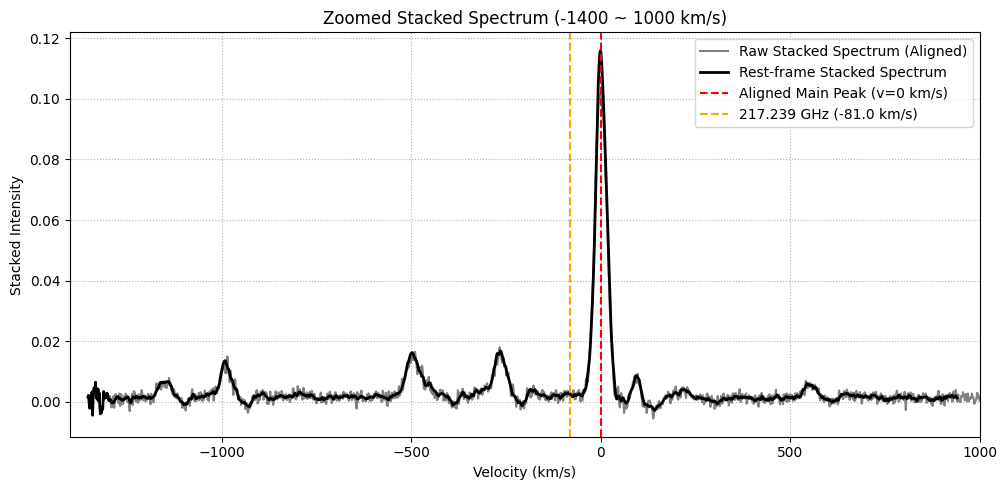

In [17]:
# 疊加
v_rest, mean_rest, std_rest = pipeline.stack_restframe(plot=False)
v_raw, mean_raw, std_raw = pipeline.stack_raw_spectra(plot=False)

pipeline.plot_stacked_zoom(
    v_rest, mean_rest,
    v_raw, mean_raw,
    target_freq= 217.238530, #DCN(3-2): 217.238530
    freq_raw0=217.104980,
    vmin=-1400, vmax=1000
)

Stacking done: 375/400 spectra used (93.8%)


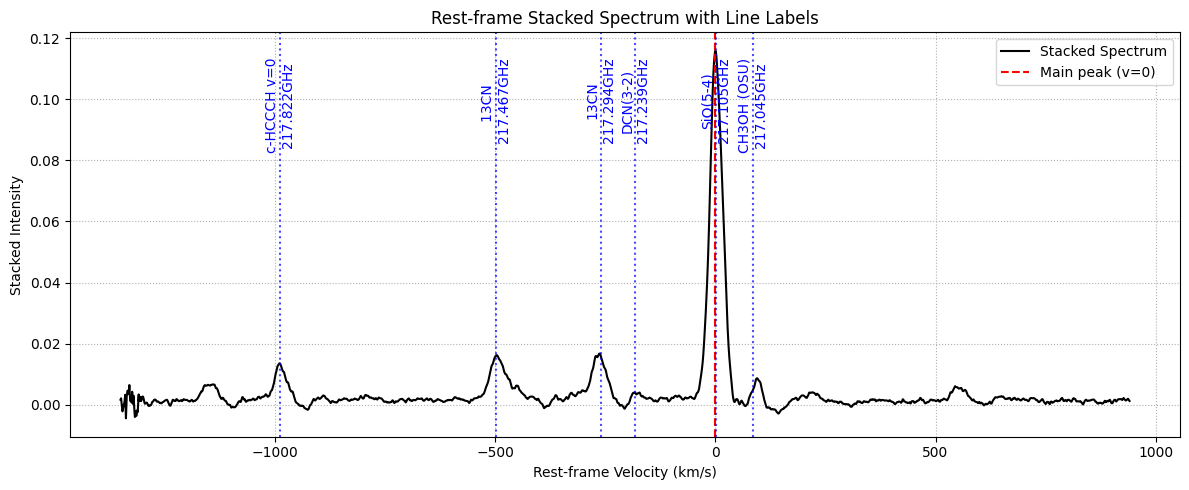

{'SiO(5-4)': 1.0527724506821414,
 'DCN(3-2)': -183.3616189921085,
 'CH3OH (OSU)': 84.45320401939705,
 '13CN': -260.60715292926653,
 '13CN ': -499.0547539352086,
 'c-HCCCH v=0': -989.2587234852573}

In [ ]:
v_grid, mean_spec, std_spec = pipeline.stack_restframe(plot=False)
# 常見分子線字典
line_dict = {
    "SiO(5-4)":       217.104980,
    "DCN(3-2)":       217.238530,
    # "DCO+(3-2)":    217.314650,
    "CH3OH (OSU)":    217.04458272,
    "13CN" :          217.29447, # N= 2- 1, J=5/2-3/2, F1= 2- 2, F= 1- 1
    "13CN " :         217.46715,  # N= 2- 1, J=5/2-3/2, F1= 3- 2, F= 4- 3
    "c-HCCCH v=0" :          217.822148,
    }

# restfreq 設為你當時疊加主峰的分子線頻率（如 SiO）
restfreq = 217.104980

# 假設 pipeline 是你的 GausspyPipeline 實例
pipeline.plot_lines_on_stack(v_grid, mean_spec, line_dict, restfreq=restfreq, label_offset=0.02)
